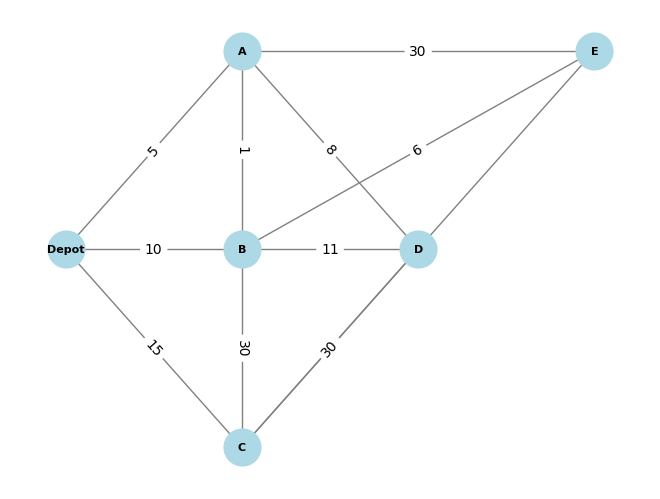

In [1]:

import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations

G = nx.Graph()
G.add_edge('Depot', 'A', weight=5, time=10)
G.add_edge('Depot', 'B', weight=10, time=12)
G.add_edge('Depot', 'C', weight=15, time=16)

G.add_edge('B', 'C', weight=30, time=9)
G.add_edge('C', 'E', weight=6, time=10)

destinations = ['A', 'B', 'C', 'D', 'E']

# Define node positions for better visualization
pos = {'Depot': (0, 0), 'A': (1, 1), 'B': (1, 0), 'C': (1, -1), 'D': (2, 0), 'E': (3, 1)}
node_size=700, node_color='lightblue', font_size=8, edge_color='gray')

# Add edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Display the graph
plt.show()

In [2]:
def calculate_path_cost(G, path):
    dist = 0
    time = 0

    for i in range(len(path) - 1):
        if path[i + 1] in G[path[i]]:
            dist += G[path[i]][path[i + 1]]['weight']
            time += G[path[i]][path[i + 1]]['time']
        else:
            return None

    return dist, time

# Find optimal path
min_dist = float('inf')
dist_optimal_path = None

min_time = float("inf")
time_optimal_path = None


In [3]:
print("\nAll Possible Paths:")
for path in permutations(destinations):
    full_path = ('Depot',) + path
    path_cost = calculate_path_cost(G, full_path)
    if path_cost is not None:
        dist, time = path_cost
        print(f"Path: {full_path}, Total Distance: {dist}, Total Time: {time}")

        if dist < min_dist:
            min_dist = dist
            dist_optimal_path = full_path

        if time < min_time:
            min_time = time
            time_optimal_path = full_path


All Possible Paths:
Path: ('Depot', 'A', 'B', 'D', 'C', 'E'), Total Distance: 53, Total Time: 46
Path: ('Depot', 'A', 'B', 'E', 'C', 'D'), Total Distance: 48, Total Time: 44
Path: ('Depot', 'A', 'D', 'B', 'C', 'E'), Total Distance: 60, Total Time: 57
Path: ('Depot', 'A', 'D', 'B', 'E', 'C'), Total Distance: 36, Total Time: 58
Path: ('Depot', 'A', 'D', 'C', 'B', 'E'), Total Distance: 79, Total Time: 47
Path: ('Depot', 'A', 'D', 'C', 'E', 'B'), Total Distance: 55, Total Time: 48
Path: ('Depot', 'A', 'E', 'B', 'C', 'D'), Total Distance: 101, Total Time: 40
Path: ('Depot', 'A', 'E', 'B', 'D', 'C'), Total Distance: 82, Total Time: 43
Path: ('Depot', 'A', 'E', 'C', 'B', 'D'), Total Distance: 82, Total Time: 50
Path: ('Depot', 'A', 'E', 'C', 'D', 'B'), Total Distance: 82, Total Time: 43
Path: ('Depot', 'B', 'A', 'D', 'C', 'E'), Total Distance: 55, Total Time: 52
Path: ('Depot', 'B', 'A', 'E', 'C', 'D'), Total Distance: 77, Total Time: 45
Path: ('Depot', 'B', 'C', 'D', 'A', 'E'), Total Distan

In [4]:
# Print optimal path
print("\nOptimal Path:")
if dist_optimal_path is not None:
    dist_optimal_cost = calculate_path_cost(G, dist_optimal_path)
    total_dist, total_time = dist_optimal_cost
    print(f"Distance Optimal Path: {dist_optimal_path}, Total Distance: {total_dist}, Total Time: {total_time}")
else:
    print("No valid distance optimal path found.")

if time_optimal_path is not None:
    time_optimal_cost = calculate_path_cost(G, time_optimal_path)
    total_dist, total_time = time_optimal_cost
    print(f"Time Optimal Path: {time_optimal_path}, Total Distance: {total_dist}, Total Time: {total_time}")
else:
    print("No valid time optimal path found.")


Optimal Path:
Distance Optimal Path: ('Depot', 'A', 'D', 'B', 'E', 'C'), Total Distance: 36, Total Time: 58
Time Optimal Path: ('Depot', 'A', 'E', 'B', 'C', 'D'), Total Distance: 101, Total Time: 40



Distance Optimal Path:
Path: ('Depot', 'A', 'D', 'B', 'E', 'C'), Total Distance: 36, Total Time: 58


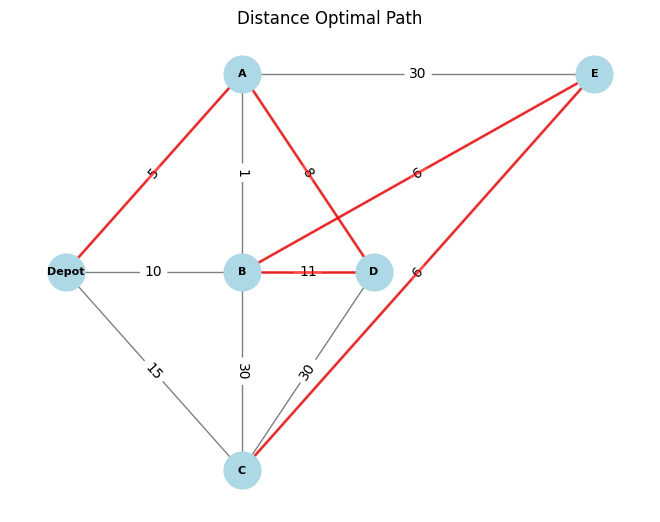


Time Optimal Path:
Path: ('Depot', 'A', 'E', 'B', 'C', 'D'), Total Distance: 101, Total Time: 40


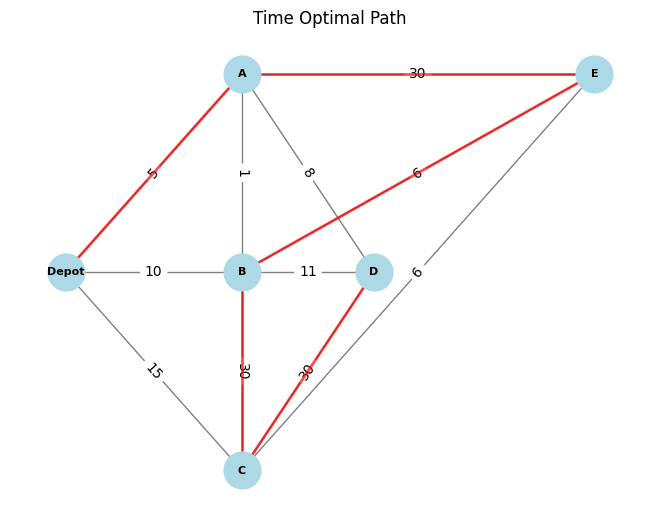

In [5]:
def plot_optimal_path(G, optimal_path, title):
    pos = {'Depot': (0, 0), 'A': (1, 1), 'B': (1, 0), 'C': (1, -1), 'D': (1.75, 0), 'E': (3, 1)}

    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='lightblue', font_size=8, edge_color='gray')

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    optimal_edges = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=optimal_edges, edge_color='red', width=2, alpha=0.7)

    plt.title(title)
    plt.show()
    # Plot distance optimal path
print("\nDistance Optimal Path:")
if dist_optimal_path is not None:
    dist_optimal_cost = calculate_path_cost(G, dist_optimal_path)
    total_dist, total_time = dist_optimal_cost
    print(f"Path: {dist_optimal_path}, Total Distance: {total_dist}, Total Time: {total_time}")
    plot_optimal_path(G, dist_optimal_path, "Distance Optimal Path")
else:
    print("No valid distance optimal path found.")

# Plot time optimal path
print("\nTime Optimal Path:")
if time_optimal_path is not None:
    time_optimal_cost = calculate_path_cost(G, time_optimal_path)
    total_dist, total_time = time_optimal_cost
    print(f"Path: {time_optimal_path}, Total Distance: {total_dist}, Total Time: {total_time}")
    plot_optimal_path(G, time_optimal_path, "Time Optimal Path")
else:
    print("No valid time optimal path found.")